# Imagenet Dir Preproceessing

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os
import torch
from torchvision import models, datasets

from data_utils.data_setup import get_imagenet_test, get_top_prediction, get_imagenet_classes
from techniques.gen_patch import gen_adversarial_patch
from metrics.utils import *
from techniques.generate_grounding import gen_grounding
from utils import get_model

datadir = '../data/test/'
#datadir = '../data/ILSVRC2012_img_val/'
save_path='../results/explanation_examples/'
torch.cuda.set_device('cuda:4')

In [18]:
import json

# find class label given folder name
def find_label(target):
    with open('../data/imagenet_class_index.json', 'r') as f:
        labels = json.load(f)
    for key in labels:
        index, label = labels[key]
        if index == target:
            return label, key
    
# get dataloader and folder names (classes)
dataset, data_loader = get_imagenet_test(datadir=datadir, shuffle=True)
labels = list(os.walk(datadir))[0][1]
list.sort(labels)

tensor([16])
ground truth class: scoreboard
predicted clas: tobacco_shop
tensor([18])
ground truth class: vase
predicted clas: gong
tensor([15])
ground truth class: school_bus
predicted clas: moving_van
tensor([1])
ground truth class: king_crab
predicted clas: tobacco_shop
tensor([16])
ground truth class: scoreboard
predicted clas: scoreboard
correct classification


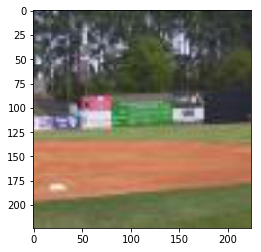

In [19]:
j=0
for i, (inp, label) in enumerate(data_loader):
    if j<1:
        print(label)
        gt_label = labels[label.numpy()[0]]
        gt_label_name, gt_label_idx = find_label(gt_label)
        print('ground truth class: {0}'.format(gt_label_name))
        img = inp[0].numpy().transpose((1, 2, 0))
        label_name = get_imagenet_classes()[label.numpy()[0]]
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        displ_img = std * img + mean
        displ_img = np.clip(displ_img, 0, 1)
        displ_img /= np.max(displ_img)
        patch_img = displ_img
        displ_img = np.uint8(displ_img*255)
        label_name, label_idx = get_top_prediction('vgg19', inp)
        print('predicted clas: {0}'.format(label_name))
        if label_name == gt_label_name:
            print('correct classification')
            plt.imshow(displ_img)
            j+=1
            break
    else:
        break

In [20]:
def lighten(img, value):
    hsvImg = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

    vValue = hsvImg[...,2]
    hsvImg[...,2]=np.where((255-vValue)<value,255,vValue+value)

    lighter_img = cv2.cvtColor(hsvImg,cv2.COLOR_HSV2BGR)
    return lighter_img

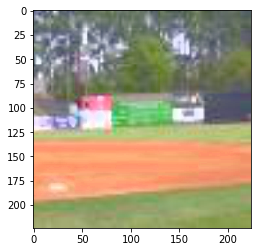

In [21]:
lighter_img = lighten(displ_img, 50)
plt.imshow(lighter_img)

result path: ../results/explanation_examples/


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


integrated gradients clasification: scoreboard


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation
saving explanation mask

saved to ../results/explanation_examples/ig-resnet18
------------------------------
Total size: 454399984
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


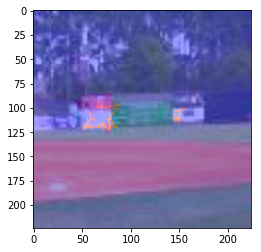

In [25]:
ig_expl_lighter = gen_grounding(lighter_img, 'ig', gt_label_name+'-lighter', 'resnet18',  show=True, save_path=save_path)

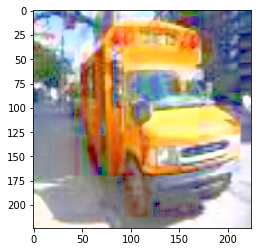

In [21]:
lightest_img = lighten(displ_img, 100)
plt.imshow(lightest_img)

result path: ../results/explanation_examples/school_bus-lightest/school_bus-lightest-04-Dec-2019_08/
integrated gradients clasification: toyshop


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation
saving explanation mask

saved to ../results/explanation_examples/school_bus-lightest/school_bus-lightest-04-Dec-2019_08/ig-vgg19
------------------------------


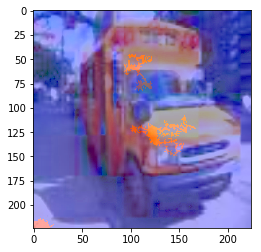

In [22]:
ig_expl_lightest = gen_grounding(lightest_img, 'vgg19', 'ig', gt_label_name+'-lightest', show=True, save_path=save_path, label_index=i)

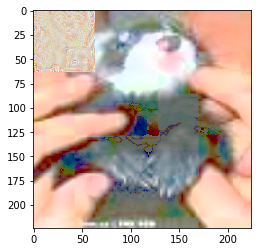

In [10]:
base_img = cv2.imread("../results/explanation_examples/black-footed_ferret/black-footed_ferret-04-Dec-2019_08/patch/original_img.png")
lighter = lighten(base_img, 100)
plt.imshow(lighter)

In [ ]:
ig_expl_lighter = gen_grounding(lighter, 'vgg19', 'ig', "black-footed_ferret-lightest", show=True, save_path=save_path, label_index=2, patch=True)

result path: ../results/explanation_examples/black-footed_ferret-lightest/black-footed_ferret-lightest-04-Dec-2019_08/patch/
integrated gradients clasification: mailbag


result path: ../results/explanation_examples/black_car-lightest/black_car-lightest-04-Dec-2019_08/
integrated gradients clasification: fire_engine


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation
saving explanation mask

saved to ../results/explanation_examples/black_car-lightest/black_car-lightest-04-Dec-2019_08/ig-vgg19
------------------------------


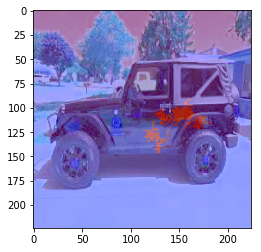

In [33]:
lightest_car = lighten(base_img, 100)
ig_expl_bcar_lightest = gen_grounding(lightest_car, 'vgg19', 'ig', "black_car-lightest", show=True, save_path=save_path, label_index=2)

(224, 224, 3)
result path: ../results/explanation_examples/white_car/white_car-04-Dec-2019_08/
integrated gradients clasification: convertible


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation
saving explanation mask

saved to ../results/explanation_examples/white_car/white_car-04-Dec-2019_08/ig-vgg19
------------------------------


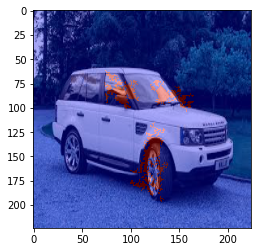

In [34]:
white_car = cv2.imread("../data/samples/white_car.jpg")
white_car = cv2.resize(white_car, (224,224))
print(white_car.shape)
ig_expl_wcar = gen_grounding(white_car, 'vgg19', 'ig', "white_car", show=True, save_path=save_path, label_index=2)

result path: ../results/explanation_examples/white_car-lighter/white_car-lighter-04-Dec-2019_08/
integrated gradients clasification: convertible


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation
saving explanation mask

saved to ../results/explanation_examples/white_car-lighter/white_car-lighter-04-Dec-2019_08/ig-vgg19
------------------------------


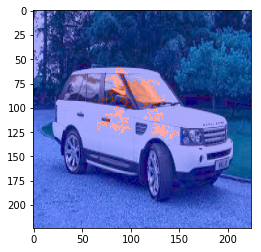

In [35]:
lighter_wcar = lighten(white_car, 50)
ig_expl_wcar_lighter = gen_grounding(lighter_wcar, 'vgg19', 'ig', "white_car-lighter", show=True, save_path=save_path, label_index=2)

result path: ../results/explanation_examples/white_car-lightest/white_car-lightest-04-Dec-2019_08/
integrated gradients clasification: racer


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finished Integrated Gradients explanation
saving explanation mask

saved to ../results/explanation_examples/white_car-lightest/white_car-lightest-04-Dec-2019_08/ig-vgg19
------------------------------


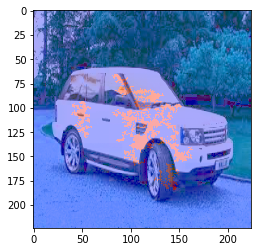

In [36]:
lightest_wcar = lighten(white_car, 100)
ig_expl_wcar_lightest = gen_grounding(lightest_wcar, 'vgg19', 'ig', "white_car-lightest", show=True, save_path=save_path, label_index=2)